In [1]:
from fastai.vision.all import *

In [2]:
path = 'dataset_v2'
fnames = get_image_files(path)
def label_func(x): return x.parent.name

In [3]:
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, number_workers=0)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


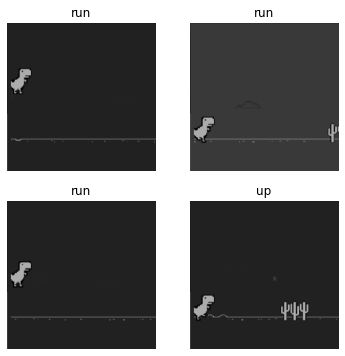

In [4]:
dls.valid.show_batch(max_n=4, nrows=2)

last image is caused by game background transition

In [5]:
learn = cnn_learner(dls, resnet18, metrics=[error_rate, accuracy])

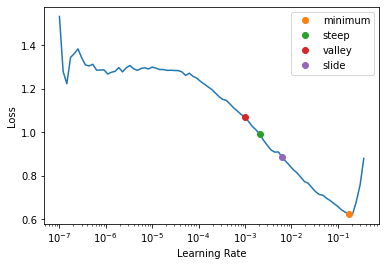

In [6]:
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [8]:
%%time
learn.fine_tune(2, base_lr=10e-03)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.027357,0.106852,0.014706,0.985294,01:30


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.085466,0.092333,0.012255,0.987745,01:55
1,0.046250,0.075502,0.007353,0.992647,01:55


CPU times: total: 32min
Wall time: 5min 20s


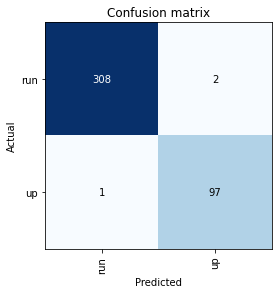

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [10]:
interp.print_classification_report()

              precision    recall  f1-score   support

         run       1.00      0.99      1.00       310
          up       0.98      0.99      0.98        98

    accuracy                           0.99       408
   macro avg       0.99      0.99      0.99       408
weighted avg       0.99      0.99      0.99       408



In [11]:
learn.export(os.path.abspath('models/v6.pkl'))